In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.gridspec import GridSpec
from pathlib import Path
import numpy as np

In [61]:
root = Path.cwd()
files = [item for item in root.rglob("music*.csv")]
print(files)

[PosixPath('/Users/jarl/Downloads/music_study/music2.csv'), PosixPath('/Users/jarl/Downloads/music_study/music1.csv')]


In [76]:
dfs = [pd.read_csv(file, names=['x', 'y', 'z'], header=0) for file in files]
df = pd.concat(dfs, axis=0, ignore_index=True).reset_index()
df

,index,x,y,z
0,0,0.560322,-0.088146,9
1,1,0.798928,-0.237082,6
2,2,0.147453,-0.139818,8
3,3,0.174263,0.221884,6
4,4,0.195710,0.620061,7
5,5,-0.613941,0.000000,9
6,6,-0.024129,0.003040,7
7,7,-0.737265,-0.686930,8
8,8,-0.005362,-0.978723,7
9,9,0.276139,-0.702128,8


In [66]:
def weighted_mean(df):
    weighted_x = (df['x'] * df['z']).sum() / df['z'].sum()
    weighted_y = (df['y'] * df['z']).sum() / df['z'].sum()

    return (weighted_x, weighted_y)

In [142]:
print(weighted_mean(df))
print((df['x'].mean(), df['y'].mean()))

(0.0028573897286125185, -0.06985695712177162)
(0.001903105041716773, -0.05895125414329615)


In [139]:
def music_scatter(df, re=False, color_index=False, weighted=False):
    # find the mean
    if weighted:
        m = weighted_mean(df)
    else:
        m = (df['x'].mean(), df['y'].mean())

    print(m)

    # actual plotting
    fig = plt.figure(dpi=300, figsize=(5,6))
    gs = GridSpec(2, 1, height_ratios=[4, 0.3], hspace=0.16)  # Adjust height_ratios and spacing (hspace)
    ax = fig.add_subplot(gs[0, 0])

    # cbar stuff
    cmap = plt.cm.rainbow

    if color_index:
        indices = df.index
        norm = plt.Normalize(vmin=indices.min(), vmax=indices.max())
        sc = ax.scatter(x='x', y='y', edgecolors='none', zorder=3, c=indices, cmap=cmap, norm=norm)
        ax.plot(df['x'], df['y'], color='gray', linestyle='-', linewidth=1, alpha=0.5)  # Lines
        cax = fig.add_subplot(gs[1, 0])
        cbar = fig.colorbar(sc, cax=cax)  # Horizontal orientation
        cbar.set_label('Score')
    else:
        scores = df['z']
        # norm = plt.Normalize(vmin=scores.min(), vmax=scores.max())
        boundaries = np.linspace(6, 10, 6)  # 6 bins (5 intervals)
        norm = BoundaryNorm(boundaries, cmap.N)
        
        sc = ax.scatter(x=df['x'], y=df['y'], edgecolors='none', zorder=3, c=df['z'], alpha=0.4, cmap=cmap, norm=norm)
        ax.scatter(x=m[0], y=m[1], color='r', zorder=3)
        ax.annotate("mean", xy=m, textcoords='offset points', xytext=(8, -8), va='center', ha='left', color='r')
        cax = fig.add_subplot(gs[1, 0])

        # colorbar stuff
        cbar = fig.colorbar(sc, cax=cax, orientation='horizontal')  # Horizontal orientation
        cbar.set_label('score')

        # Calculate the midpoints of each bin for the colorbar ticks
        bin_centers = (boundaries[:-1] + boundaries[1:]) / 2

        # Set the ticks to the bin centers
        cbar.set_ticks(bin_centers)
        cbar.set_ticklabels([6, 7, 8, 9, 10])

    # axes stuff
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_position('center')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # labels
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.text(x=0, y=1.05, s="autistic", va='bottom', ha='center')
    ax.text(x=0, y=-1.05, s="neurotypical", va='top', ha='center')
    ax.text(x=1.05, y=-0, s="virgin", va='center', ha='left')
    ax.text(x=-1.07, y=-0, s="male\n manipulator", va='center', ha='center')

    # add a grid
    ax.grid(zorder=0)

    if re:
        return fig

In [134]:
weighted_mean(df)

(0.0028573897286125185, -0.06985695712177162)

(0.0028573897286125185, -0.06985695712177162)


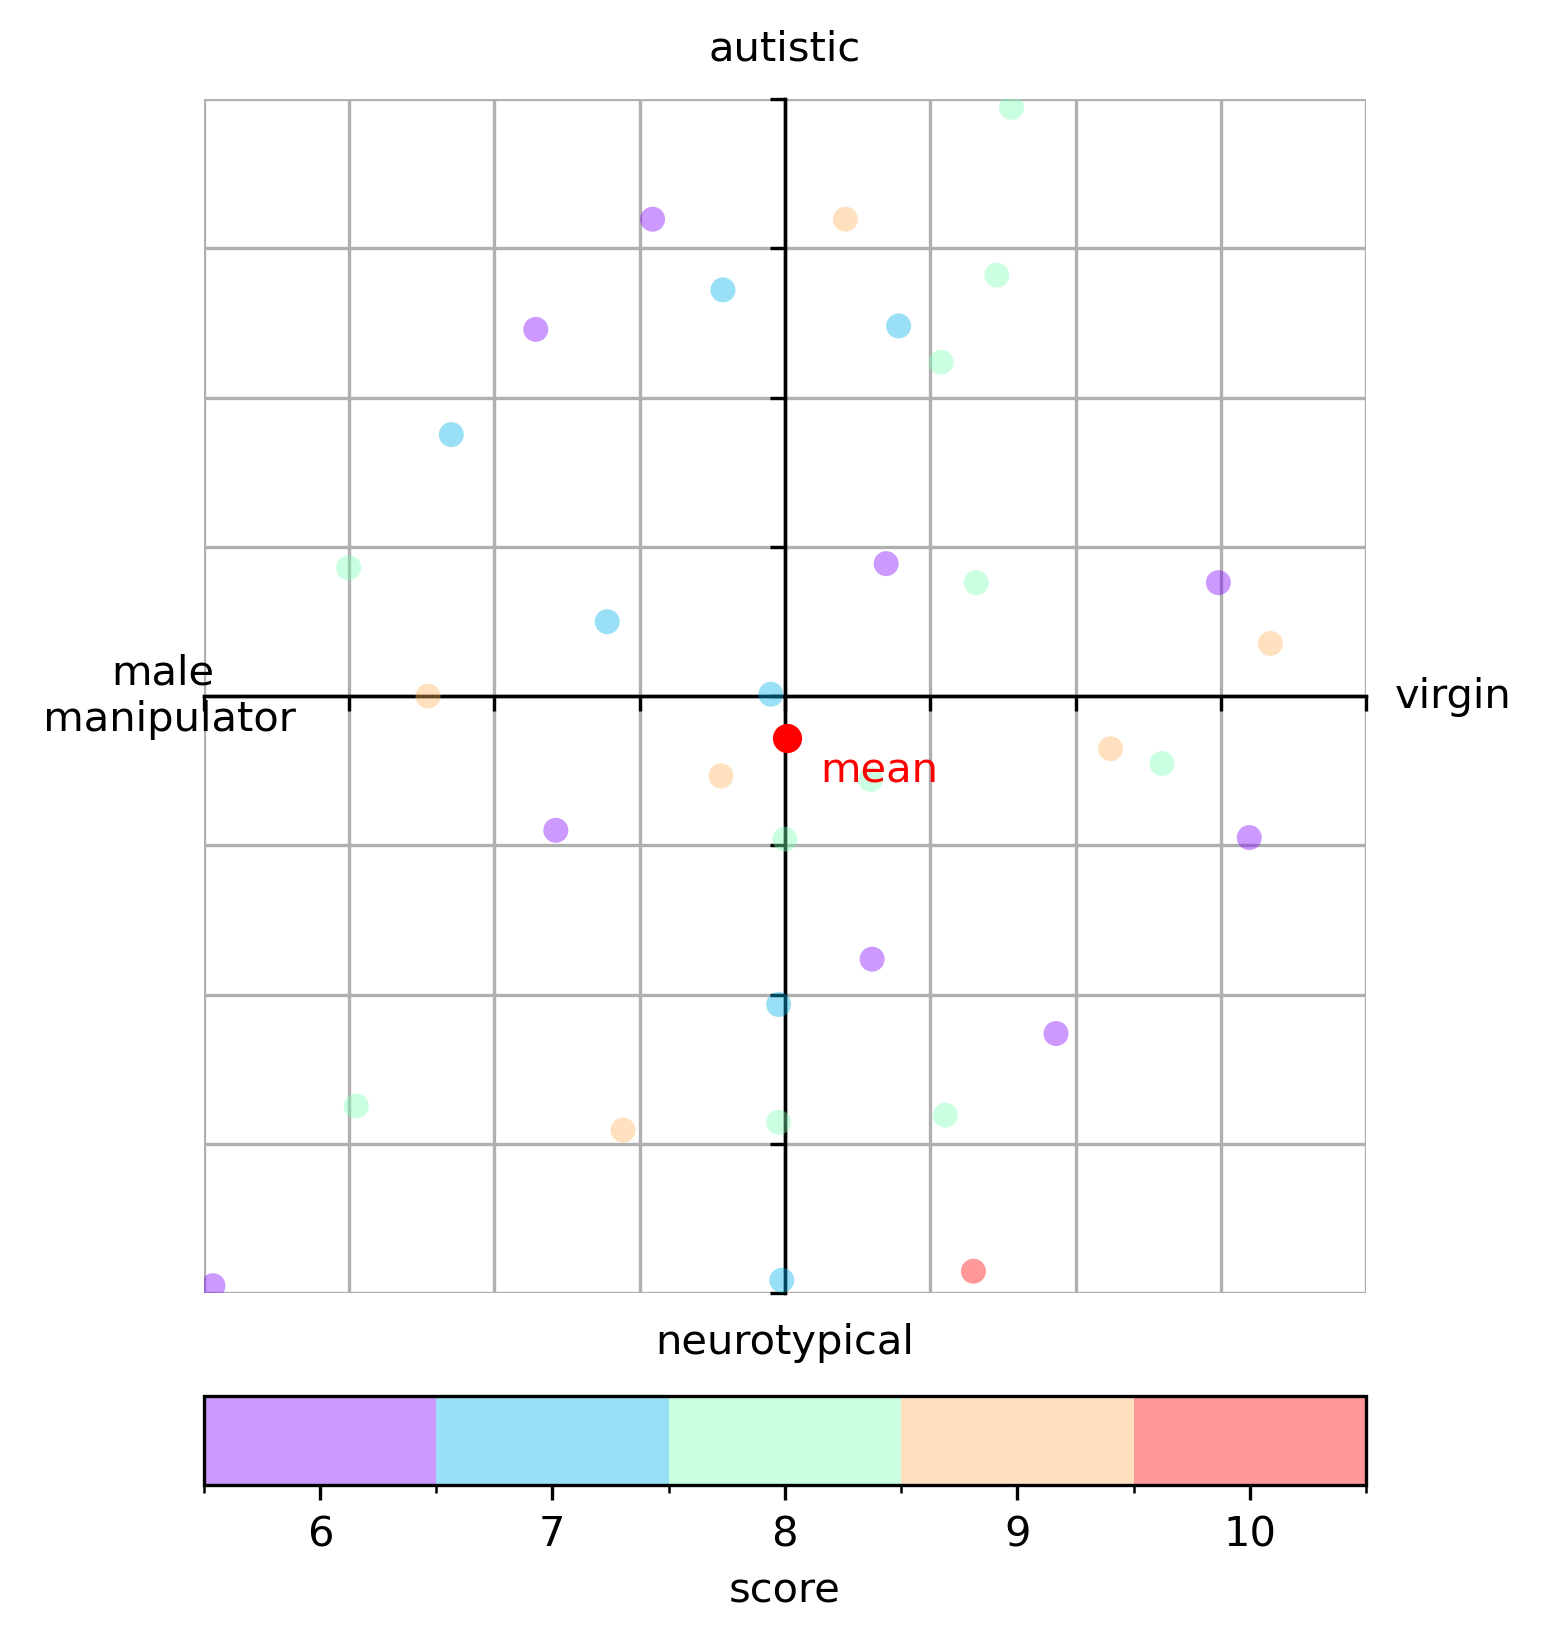

In [140]:
fig = music_scatter(df, weighted=True, re=True)

(0.001903105041716773, -0.05895125414329615)


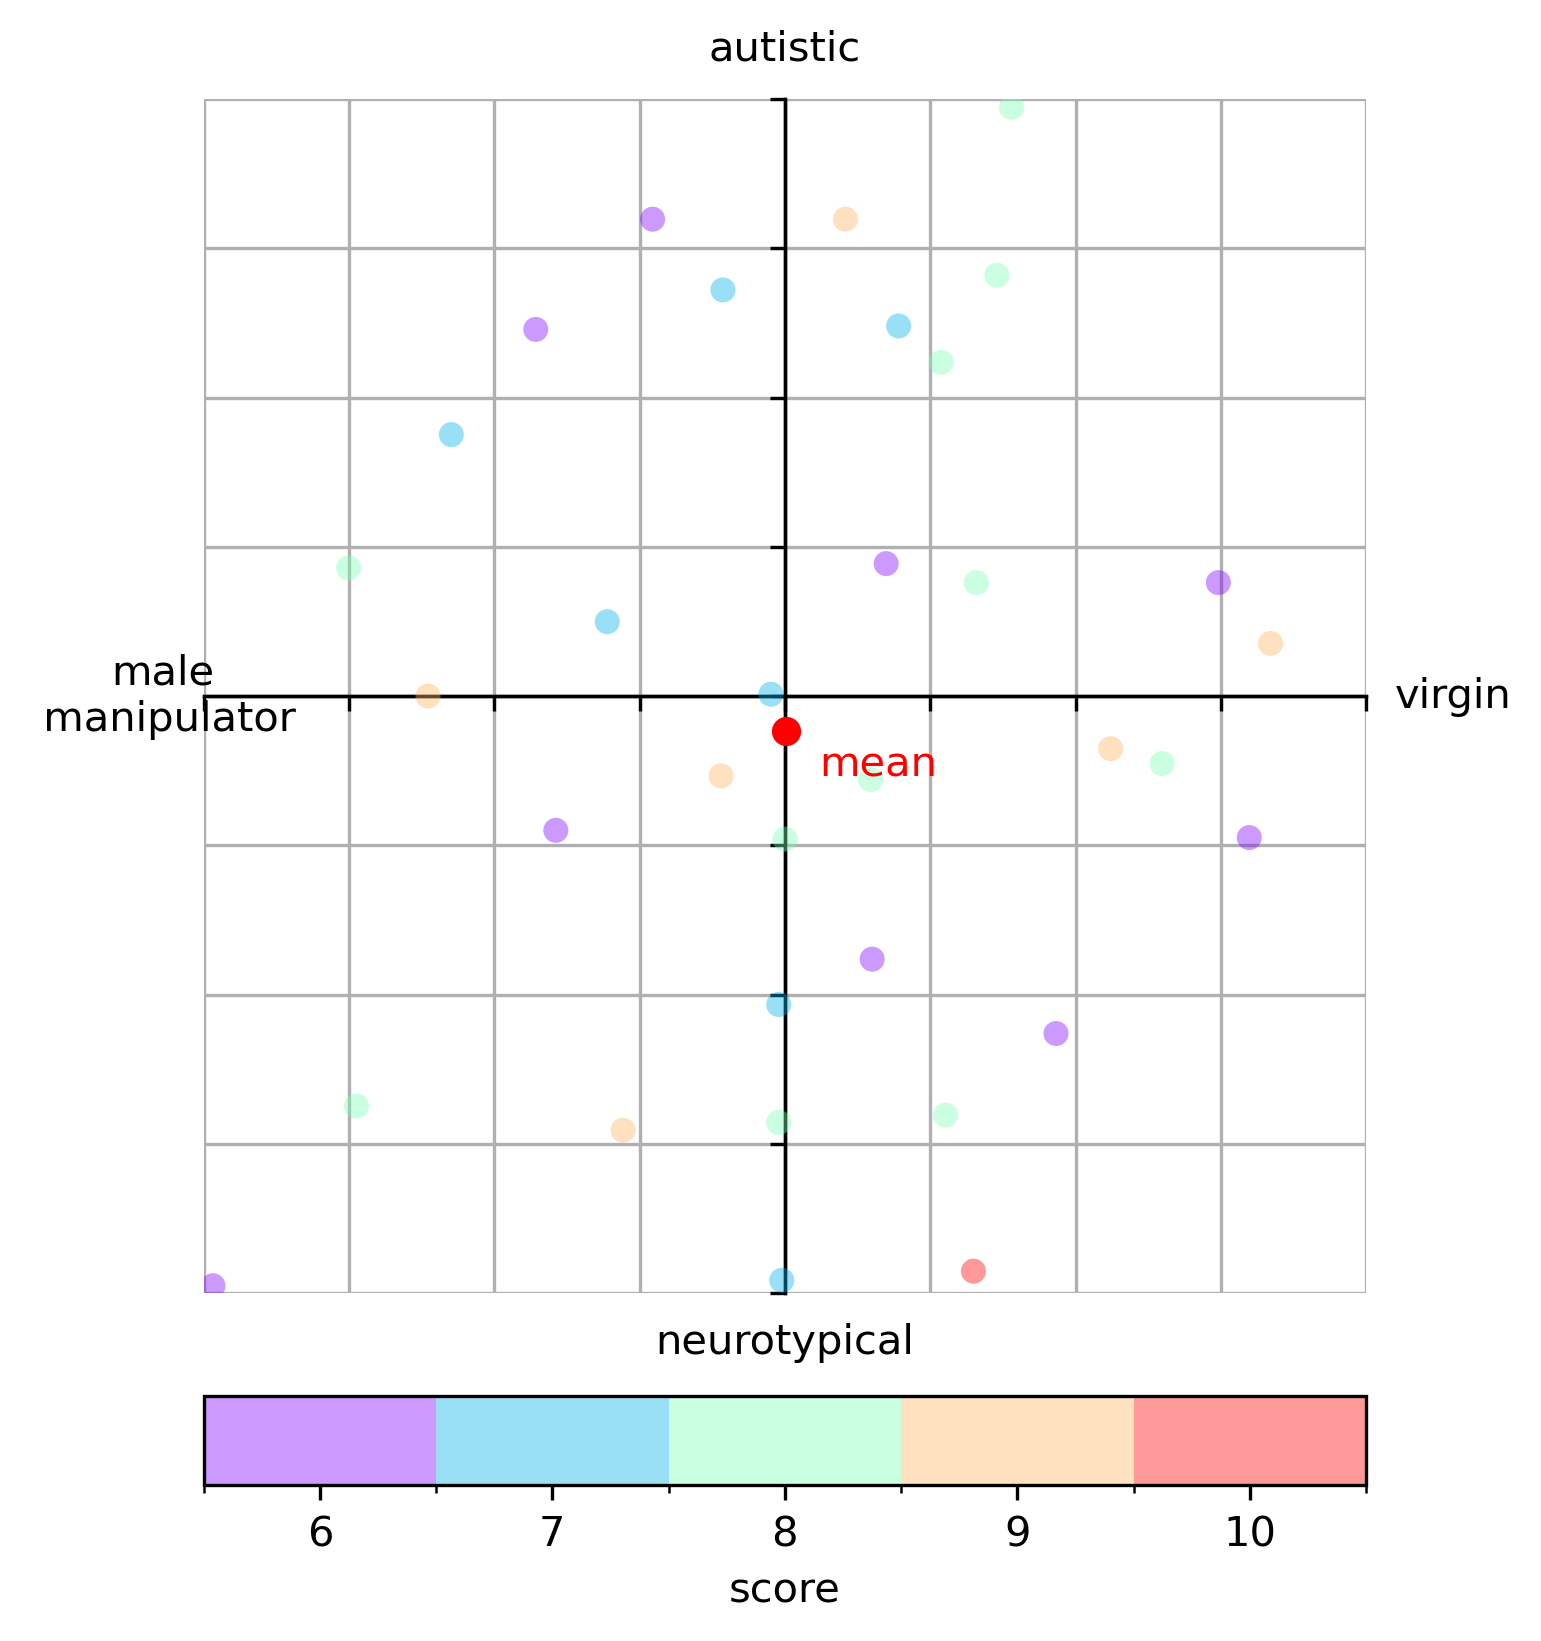

In [141]:
fig = music_scatter(df)

In [136]:
fig.savefig('music_study.png', bbox_inches='tight')

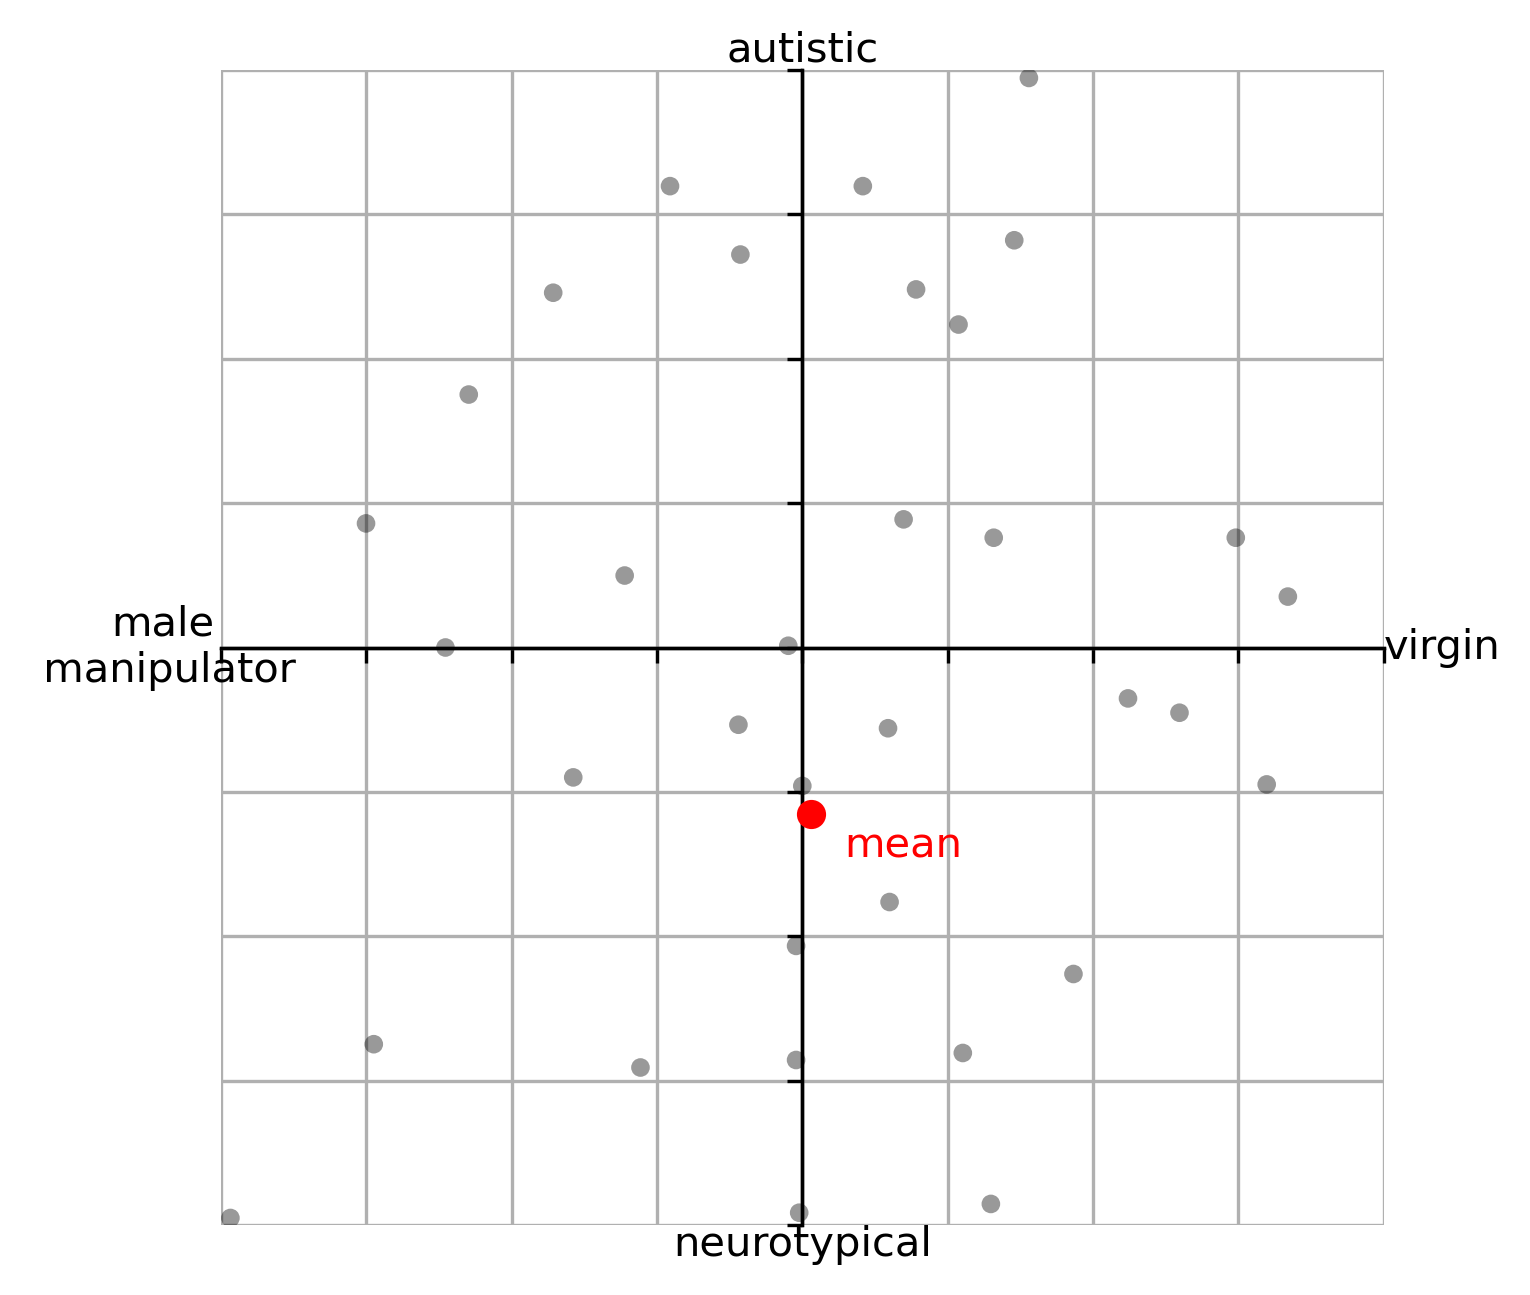

In [71]:
music_scatter(df, weighted=True)